In [1]:
print("Hello World!") # This is a comment

Hello World!


This is a markdown test \
$f(x) = mx + b$

In [2]:
import numpy as np #import numpy as np
from matplotlib import pyplot as plt #import matplotlib.pyplot as plt


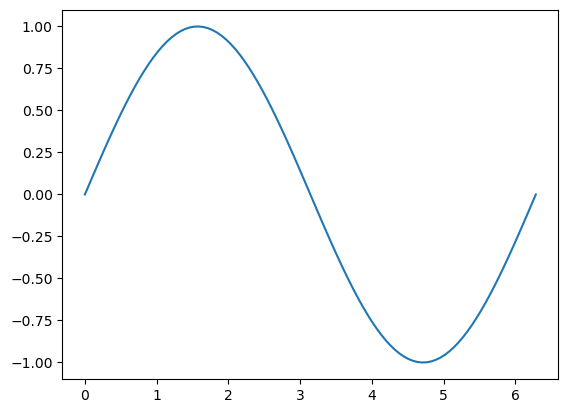

In [3]:
xs = np.linspace(0,2*np.pi,100) # create an array of 100 points between 0 and 2pi (pi = np.pi)
ys = np.sin(xs) # compute the sine of each of those points (np.sin is the sine function)
plt.plot(xs,ys) # plot the points (xs,ys)

In [4]:
rng = np.random.default_rng(0) # create a random number generator with a seed of 0
x = rng.uniform(1.0, 2.0)         # single float in [1,2)
a = rng.uniform(1.0, 2.0, size=5) # 1D array of 5 floats in [1,2)
print(x)
print(a)

1.6369616873214543
[1.26978671 1.04097352 1.01652764 1.81327024 1.91275558]


In [5]:

rng1 = np.random.default_rng(0) # seed of 0
print(rng1.random(), rng1.integers(1,3))

rng2 = np.random.default_rng(0)  # same seed => same outputs
print(rng2.random(), rng2.integers(1,3))

rng3 = np.random.default_rng()   # no seed => non-deterministic
print(rng3.random(), rng3.integers(1,3))

0.6369616873214543 2
0.6369616873214543 2
0.4515513753634861 1


In [6]:
test_samples = [np.random.uniform() for _ in range(100000)]
print(test_samples[:10]) # print the first 10 samples

[0.4752213374131573, 0.8290267231273823, 0.2766490241297215, 0.6910295808175745, 0.6999452474228246, 0.4707995422477247, 0.4966644349221263, 0.4830081792141465, 0.23797529537257123, 0.5004973584178768]


In [7]:
another_rng = np.random.default_rng() # no seed => non-deterministic
test_samples = [another_rng.uniform(-1, 1) for _ in range(100000)] # call the method on the generator, specify range, and loop 100,000 times
print(test_samples[:10]) # print the first 10 samples

[-0.21892220103964943, -0.7715199763228688, -0.28895265757353705, -0.965528334836282, 0.044874544845260766, 0.903789325201789, -0.6822302523076802, -0.0785361027068352, 0.057235257742399126, -0.9002408751394042]


2
4
2.0
4.0
1.23e+04
12345.68
Hello Jake, x ≈ 0.667


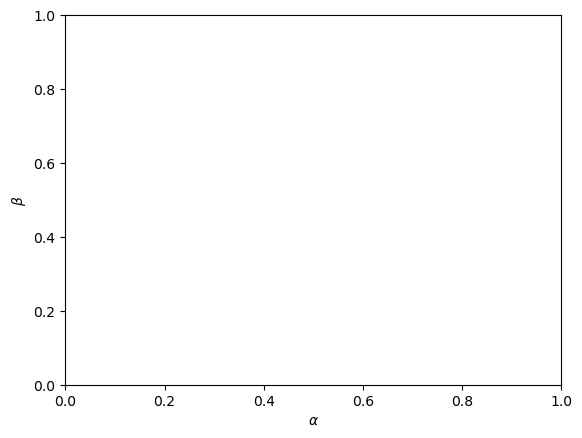

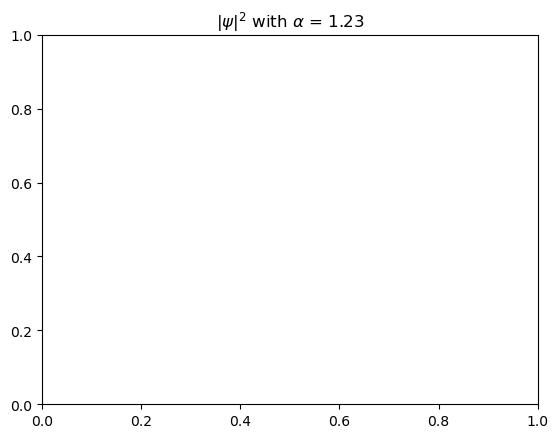

In [8]:
# ========================= Note on Rounding and Formatting =========================

# The built-in round function uses "bankers' rounding" (round half to even)
print(round(2.5))  # Outputs: 2
print(round(3.5))  # Outputs: 4
# NumPy's around function always rounds half away from zero
print(np.around(2.5))  # Outputs: 3.0
print(np.around(3.5))  # Outputs: 4.0

# .e and .f are format specifiers for scientific and fixed-point notation, respectively (the decimals are rounded (banker's) to the specified number of places)
value = 12345.6789
print(f"{value:.2e}")  # Scientific notation with 2 decimal places: 1.23e+04
print(f"{value:.2f}")  # Fixed-point notation with 2 decimal places: 12345.68

# f-strings vs raw strings (r"...") and raw f-strings (rf"...") — quick guide
#
# f"...": interpolate Python expressions inside { } and format with specs.
#   - ROUNDS for display (e.g., :.3f, :.2e), does not change the underlying value.
#   - Examples:
name = "Jake"; x = 2/3
s1 = f"Hello {name}, x ≈ {x:.3f}"          
print(s1) # 'Hello Jake, x ≈ 0.667'
#
# r"...": raw string literal — backslashes are NOT treated as escapes.
#   - Good for LaTeX, regex, Windows paths: r"\alpha\beta" keeps the backslashes (only for rendering in Matplotlib).
#   - No interpolation: { } are literal characters.
#   - Note: a raw string can’t end with a single backslash: r"foo\"  # ❌
latex_str_1 = r"$\alpha$"
latex_str_2 = r"$\beta$"
plt.xlabel(latex_str_1)
plt.ylabel(latex_str_2)
plt.show()

# rf"..."/fr"...": combine BOTH — interpolate AND keep backslashes raw.
#   - Perfect for LaTeX with variables in Matplotlib titles/labels.
#   - Examples:
alpha = 1.2345
title = rf"$|\psi|^2$ with $\alpha$ = {alpha:.2f}"  # LaTeX + formatted value
plt.title(title)
plt.show()

# Tip: If you don’t need interpolation, prefer r"..." for LaTeX.
#      If you do need it, use rf"...". Avoid doubling backslashes when using r/rf.

In [9]:
# ========================= Broadcasting & Pointwise Ops: Quick Reference =========================
# How array operations work in NumPy:
#
# 1) SAME SHAPE -> POINTWISE
#    If two arrays have exactly the same shape, operations are elementwise (pointwise).
#    Example: (2,3) with (2,3)
#
# 2) DIFFERENT SHAPES -> BROADCASTING (conceptual model)
#    NumPy uses broadcasting to make shapes compatible without copying data.
#    Mental model (no actual data is changed unless you reshape explicitly):
#      Step A) ALIGN TRAILING AXES: Conceptually pad the SHORTER shape with LEADING 1s
#              so both shapes have the same number of axes. (Right-to-left alignment.)
#      Step B) COMPATIBILITY CHECK (right → left): each axis pair is compatible if sizes
#              are equal OR one of them is 1. Otherwise -> ValueError.
#      Step C) RESULT SHAPE: take the per-axis maximum across the aligned shapes.
#      Step D) VIRTUAL DUPLICATION: any operand with size 1 on an axis is *logically*
#              repeated along that axis to the result size (no copy; done via strides).
#
#    IMPORTANT: Implicit padding is ALWAYS on the LEFT (leading axes).
#               Example: (3,) with (2,3,4) is treated as (1,1,3) vs (2,3,4), not (3,1,1).
#
# 3) INSERTING SIZE-1 AXES YOURSELF
#    Use None / np.newaxis to explicitly add size-1 axes wherever you want to control alignment.
#    Example: x[:, None] turns shape (N,) into (N,1); x[None, :] turns (N,) into (1,N).
#
# 4) BOOLEAN MASKS + np.where
#    Masks are just boolean arrays that also broadcast. np.where(cond, X, Y) broadcasts cond, X, Y
#    together to a common shape, then selects per element. One-arg form np.where(cond) returns
#    index arrays where cond is True.
#
# 5) PERFORMANCE NOTE
#    Broadcasting reuses memory; it doesn’t make big copies. If you truly need repeated data,
#    use np.tile(...). If you want a broadcasted *view*, use np.broadcast_to(...), which is read-only.
#
# -----------------------------------------------------------------------------------------------
# Minimal runnable demos (with explicit "padding/duplication" commentary)

print("\n[1) SAME SHAPE -> POINTWISE]")
A = np.array([[1,  2,  3],
              [4,  5,  6]])            # shape (2,3)
B = np.array([[10, 20, 30],
              [40, 50, 60]])           # shape (2,3)
# Pointwise: each position (i,j) adds directly, no padding/duplication needed.
print("A+B shape:", (A + B).shape)     # (2,3)
print(A + B)

print("\n[2) BROADCASTING: scalar example (fills every element)]")
scalar = 99.0                           # shape ()  (no axes)
# Conceptually: () -> (1,1) -> duplicates to match (2,3):
# 99  -> [[99]] -> [[99,99,99],
#                  [99,99,99]] (fills every element)
print("(2,3) op () ->", (A + scalar).shape)
print(A + scalar)

print("\n[3) BROADCASTING: implicit left padding, right-to-left comparison]")
rowvec = np.array([100, 200, 300])      # shape (3,)
# Conceptual padding: (3,) -> (1,3) so axes align with A:(2,3)
# Duplication story: [100,200,300] -> [[100,200,300]] -> duplicated across rows ->
# [[100,200,300],
#  [100,200,300]]
print("(2,3) op (3,) ->", (A + rowvec).shape)   # (2,3)
print(A + rowvec)

colvec = np.array([[1],
                   [2]])                # shape (2,1)
# Already 2-D: (2,1) aligns with A:(2,3)
# Duplication story: ([1],[2]])^T -> each row duplicates across columns ->
# [[1,1,1],
#  [2,2,2]]
print("(2,3) op (2,1) ->", (A + colvec).shape)  # (2,3)
print(A + colvec)

print("\n[4) WHEN YOU MUST CONTROL WHICH AXIS MATCHES: insert 1-sized axes explicitly]")

# Base arrays
X = np.zeros((2,3,4))         # (rows=2, cols=3, depth=4)
Y = np.zeros((3,5,20))        # (rows=3, cols=5, depth=20)
x = np.array([10,20,30])      # (3,)

# -----------------------------------------------------------------------------
# Case 1: AUTOMATIC alignment (implicit left padding): (3,) -> (1,1,3)
# -----------------------------------------------------------------------------
# Intuition (rows, cols, depth) with x = [10,20,30]:
#   X.shape = (2,3,4) vs x.shape = (3,) ~ (1,1,3)
#   rows : 1 → 2   (would duplicate single row)
#   cols : 1 → 3   (would duplicate single column)
#   depth: 3 vs 4  ❌ mismatch on the last axis → ValueError (no broadcast)
try:
    R = X + x                       # (1,1,3) vs (2,3,4) → incompatible on last axis
    print("(2,3,4) op (1,1,3) ->", R.shape)
except ValueError as e:
    print("(2,3,4) op (1,1,3) fails (expected):", e)
# -----------------------------------------------------------------------------
# Case 3: Align the '3' with the MIDDLE axis of X: (3,) -> (1,3,1)
# -----------------------------------------------------------------------------
x_mid = x[None, :, None]               # shape (1,3,1)
# Alignment: (1,3,1) + (2,3,4) -> result (2,3,4)
R = X + x_mid
print("(2,3,4) op (1,3,1) ->", R.shape)

# Intuition (rows, cols, depth):
#   rows:  1 → 2  (duplicate single row to 2 rows)
#   cols:  3 = 3  (columns map to [10,20,30])
#   depth: 1 → 4  (repeat across 4 depth slices)
#
# For any fixed depth d:
#   R[:, :, d] =
#     [[10,20,30],
#      [10,20,30]]
#
# For any fixed row r:
#   R[r, :, d] = [10,20,30]    (same for both rows)
#
# For any fixed column c:
#   c=0 → R[:,0,d] = [10,10]
#   c=1 → R[:,1,d] = [20,20]
#   c=2 → R[:,2,d] = [30,30]

# -----------------------------------------------------------------------------
# Case 2: Align the '3' with the FIRST axis of Y: (3,) -> (3,1,1)
# -----------------------------------------------------------------------------
x_first = x[:, None, None]             # shape (3,1,1)
# Alignment: (3,1,1) + (3,5,20) -> result (3,5,20)
S = Y + x_first
print("(3,5,20) op (3,1,1) ->", S.shape)

# Intuition (rows, cols, depth):
#   rows:  3 = 3  (row 0→10, row 1→20, row 2→30)
#   cols:  1 → 5  (duplicate across columns)
#   depth: 1 → 20 (duplicate across depth)
#
# For any fixed row r:
#   S[r, :, d] is a length-5 row, all equal to x[r]  (e.g., row 0 is all 10s)
#
# For any fixed column c:
#   S[:, c, d] = [10,20,30] (down the rows)
#
# For any fixed depth k:
#   S[:, :, k] =
#     [[10,10,10,10,10],
#      [20,20,20,20,20],
#      [30,30,30,30,30]]

print("\n[5) RESULT SHAPE rule: per-axis max after padding]")
# (2,1,3) vs (1,4,1):
# Padding already matches; per-axis max -> (2,4,3)
# Duplication: the (2,1,3) array duplicates along axis 1; the (1,4,1) array duplicates along axes 0 and 2
U = np.zeros((2,1,3))
V = np.zeros((1,4,1))
W = U + V
print("(2,1,3) op (1,4,1) ->", W.shape)  # (2,4,3)
# ================================================================================================





[1) SAME SHAPE -> POINTWISE]
A+B shape: (2, 3)
[[11 22 33]
 [44 55 66]]

[2) BROADCASTING: scalar example (fills every element)]
(2,3) op () -> (2, 3)
[[100. 101. 102.]
 [103. 104. 105.]]

[3) BROADCASTING: implicit left padding, right-to-left comparison]
(2,3) op (3,) -> (2, 3)
[[101 202 303]
 [104 205 306]]
(2,3) op (2,1) -> (2, 3)
[[2 3 4]
 [6 7 8]]

[4) WHEN YOU MUST CONTROL WHICH AXIS MATCHES: insert 1-sized axes explicitly]
(2,3,4) op (1,1,3) fails (expected): operands could not be broadcast together with shapes (2,3,4) (3,) 
(2,3,4) op (1,3,1) -> (2, 3, 4)
(3,5,20) op (3,1,1) -> (3, 5, 20)

[5) RESULT SHAPE rule: per-axis max after padding]
(2,1,3) op (1,4,1) -> (2, 4, 3)


In [10]:
# Basics: boolean masks and np.where (both forms)

# mask = (arr1 == arr2)
# -> boolean array with the *broadcasted shape* of arr1 and arr2, compare elementwise
#    (key rule: per axis, sizes are compatible if equal or one is 1; scalars broadcast to any shape)
#    If arr1 and arr2 have the same shape, mask[i,j] is True iff arr1[i,j] == arr2[i,j], else False
#    If arr2 is a scalar (number): mask[i,j] is True iff arr1[i,j] == arr2[i,j] = arr2 (the scalar broadcasts to arr1’s shape)

# out = np.where(mask, X, Y)
# -> array with the *broadcasted shape* of (mask, X, Y)
#    out[i,j] = X[i,j] if mask[i,j] is True, else Y[i,j]
#    (X and Y can be scalars or arrays; use 0.0 to keep float dtype.)
#
# idx = np.where(mask)    [ONE-ARG FORM]
# -> tuple of index arrays (one per dimension) giving positions where mask is True
#    For 2D: row_indices, col_indices = np.where(mask)

a = np.array([[1, 2, 3],
              [4, 5, 6]])
b = np.array([[1, 9, 3],
              [0, 5, 0]])
# Build masks
mask_eq3   = (a == 3)               # elementwise equality
mask_gt3   = (a > 3)                # elementwise comparison
mask_even  = (a % 2 == 0)           # parity mask
mask_combo = mask_gt3 & ~mask_even  # combine with & (and), | (or), ~ (not)
mask_meq = (a == b)                 # elementwise comparison → boolean mask (same shape)

print("a:\n", a)
print("\nmask (a == 3):\n", mask_eq3)
print("\nmask (a > 3):\n", mask_gt3)
print("mask (even):\n", mask_even)
print("mask (a>3 AND odd):\n", mask_combo)
print("mask = (A == B):\n", mask_meq)  


# Make arrays print fully and on wide lines
np.set_printoptions(threshold=np.inf, linewidth=10_000)

def show(label, x):
    print(f"{label}:\n{x}\n")  # label on one line, value on the next

# np.where with scalars
show("np.where(mask_eq3, 10, 0)", np.where(mask_eq3, 10, 0))  # True -> 10 else 0

# np.where with arrays
show("np.where(mask_meq, a, b)", np.where(mask_meq, a, b))    # True -> a[i,j] else b[i,j]

# Broadcasting demo with where: row vector broadcasts across rows
rowvec = np.array([100, 200, 300])  # shape (3,)
show("np.where(mask_gt3, rowvec, -1)", np.where(mask_gt3, rowvec, -1)) # True -> rowvec[j] else -1

# One-arg np.where: get row and column indices where True
rows, cols = np.where(mask_eq3)
show("np.where(mask_eq3) -> rows", rows)
show("np.where(mask_eq3) -> cols", cols)

# Using masks to index into an array 
show("the values where a > 3", a[mask_gt3]) # 1d array of values where mask is True

a:
 [[1 2 3]
 [4 5 6]]

mask (a == 3):
 [[False False  True]
 [False False False]]

mask (a > 3):
 [[False False False]
 [ True  True  True]]
mask (even):
 [[False  True False]
 [ True False  True]]
mask (a>3 AND odd):
 [[False False False]
 [False  True False]]
mask = (A == B):
 [[ True False  True]
 [False  True False]]
np.where(mask_eq3, 10, 0):
[[ 0  0 10]
 [ 0  0  0]]

np.where(mask_meq, a, b):
[[1 9 3]
 [0 5 0]]

np.where(mask_gt3, rowvec, -1):
[[ -1  -1  -1]
 [100 200 300]]

np.where(mask_eq3) -> rows:
[0]

np.where(mask_eq3) -> cols:
[2]

the values where a > 3:
[4 5 6]



In [11]:
# ==================== Matmul (@) rules in NumPy/JAX ====================
# `A @ B` follows np.matmul semantics:
# - Works on the LAST TWO dims as matrices; any leading dims are "batch" and are broadcast.
# - Special cases for 1D array (shape (d,)), no row/column orientation implied:
#     (d,)   @ (d,)        -> ()          # scalar dot
#     (m,n)  @ (n,)        -> (m,)        # matrix–vector
#     (n,)   @ (n,m)       -> (m,)        # vector–matrix
# - Pure 2D "row/column" vectors:
#     (1,n)  @ (n,1)       -> (1,1)       # row · column
#     (n,1)  @ (1,m)       -> (n,m)       # column · row
# - Batched matmul:
#     (B,m,n) @ (B,n,p)    -> (B,m,p)     # batch dims broadcast if compatible


# 1D @ 1D -> scalar
a = np.array([1., 2., 3.])       # (3,)
b = np.array([4., 5., 6.])       # (3,)
s = a @ b                          # ()
print("1D@1D:", s.shape)          # ()

# 2D @ 1D -> vector
M = np.arange(6.).reshape(2,3)    # (2,3)
v = np.array([1., 0., -1.])       # (3,)
y = M @ v                           # (2,)
print("2D@1D:", y.shape)           # (2,)

# 1D @ 2D -> vector
N = np.arange(12.).reshape(3,4)   # (3,4)
z = v @ N                          # (4,)
print("1D@2D:", z.shape)           # (4,)

# If you want explicit row/column behavior, reshape:
row = v[None, :]                    # (1,3)   row vector
col = v[:, None]                    # (3,1)   column vector
rc = row @ col                      # (1,1)
cr = col @ row                      # (3,3)
print("(1,3)@(3,1):", rc.shape, "  (3,1)@(1,3):", cr.shape)

# Batched matmul: leading dims broadcast; last two do matmul
A = np.ones((5, 2, 3))             # (batch=5, 2x3)
B = np.ones((5, 3, 4))             # (batch=5, 3x4)
C = A @ B                            # (5, 2, 4)
print("Batched:", C.shape)

# ---------------- Under the hood intuition ----------------
# For 1D@1D, treats the 1D LHS as (1,n) and the 1D RHS as (n,1) and does (1,n)@(n,1)->(1,1), then squeezes to ().
# For 2D@1D, matmul temporarily treats the 1D RHS as (n,1), does (m,n)@(n,1)->(m,1), then squeezes the trailing size-1 dim -> (m,).
# For 1D@2D, it treats the 1D LHS as (1,n), does (1,n)@(n,m)->(1,m), then squeezes the leading size-1 dim -> (m,).


1D@1D: ()
2D@1D: (2,)
1D@2D: (4,)
(1,3)@(3,1): (1, 1)   (3,1)@(1,3): (3, 3)
Batched: (5, 2, 4)


In [12]:
# =============================================================================
# Probability quick notes 
# -----------------------------------------------------------------------------
# RANDOM VARIABLE (RV)
# - A (measurable) map X : (Omega, F, P) -> R.
#   * Omega = sample space (all outcomes)
#   * F     = sigma-algebra of events
#   * P     = probability measure on (Omega, F)
# - Range/image of X is a subset of R.
# - Support = points in R where the distribution has nonzero mass/density.
#
# CDF
# - F_X(t) = P(X <= t).
# - Always exists (discrete, continuous, or mixed).
#
# CONTINUOUS CASE: DENSITY (pdf)
# - If X has a pdf f(x), then P(a <= X <= b) = ∫[a,b] f(x) dx, and ∫ f(x) dx = 1.
# - Histogram estimator (iid samples x_1,...,x_N):
#     height(bin around x) = (count_in_bin) / (N * bin_width)
#   Under regularity, as N -> ∞, bin_width h -> 0, and N*h -> ∞,
#   histogram height at the bin midpoint approximates f(x).
#
# DISCRETE CASE: PROBABILITY MASS FUNCTION (pmf)
# - p_X(x) = P(X = x), with p_X(x) >= 0 and sum_x p_X(x) = 1.
# - CDF: F_X(t) = sum_{x <= t} p_X(x) (for ordered support).
# - Estimation from data: p_hat(x) = (# of samples equal to x) / N.
#   NOTE: Unlike histograms for densities, DO NOT divide by bin_width.
#
# EXPECTATION / VARIANCE
# - Continuous: E[X] = ∫ x f(x) dx; Var(X) = ∫ (x - E[X])^2 f(x) dx.
# - Discrete:   E[X] = sum_x x p_X(x); Var(X) = sum_x (x - E[X])^2 p_X(x).
#
# MIXED DISTRIBUTIONS
# - Some variables have both discrete atoms and continuous parts.
#   * A histogram captures only the continuous component.
#   * Atoms appear as spikes that grow as bin_width -> 0.
# - The empirical CDF F_N(t) = (1/N) * sum 1{x_i <= t} always converges
#   uniformly to F_X(t) (Glivenko–Cantelli), regardless of type.
#
# PRACTICAL HISTOGRAM TIP
# - For a density-like histogram in code: use density=True in plotting, or
#   manually set heights to (counts / (N * bin_width)) to approximate pdf.
# =============================================================================


In [13]:
# --- Uniform Monte Carlo (baseline) ---
# Goal: estimate I = ∫_0^1 f(x) dx when the target density is uniform t(x) = 1 on [0,1]
# Draw X ~ Unif(0,1). By the Law of Large Numbers, the sample mean → expected value as N → ∞:
#     I = ∫_0^1 f(x) t(x) dx = E_t[f(X)]  ≈  (1/N) ∑_{i=1}^N f(X_i),   X_i ~ Unif(0,1)
# This estimator is simple and unbiased. Its variance is:
#     Var(Ī_MC) = (1/N) Var_t(f(X)) = (1/N) [ E_t(f(X)^2) - (E_t[f(X)])^2 ] = (1/N) [E_t(f(X)^2) - I^2] = (1/N) [ ∫_0^1 f(x)^2 dx − I^2] (high variance if f varies a lot over [0,1])

# --- Importance Sampling (variance reduction) ---
# Idea: sample from a proposal pdf p(x) on [0,1] that places more mass where |f(x)| is large, then reweight to keep the same target integral
# Let w(x) = t(x)/p(x). Since t(x)=1 on [0,1]:
#     I = ∫ f(x) t(x) dx = ∫ f(x) w(x) p(x) dx = E_{X~p}[ f(X) w(X) ]
# Monte Carlo estimator:
#     Ī_IS = (1/N) ∑ f(X_i) w(X_i),   X_i ~ p
# Variance (assuming normalized t and p):
#     Var(Ī_IS) = (1/N) [ E_p( (f(X) w(X))^2 ) - I^2 ] = (1/N) [ ∫ f(x)^2 t(x)^2 / p(x) dx - I^2 ] (if p ~ |f| (or |f|·t), typically lower variance than uniform MC)

# --- Inversion Sampling (to draw from nonuniform distribution p(x) on [0,1]) ---
# If U ~ Unif(0,1) and F_p is a CDF with inverse F_p^{-1}, then X = F_p^{-1}(U) has PDF p(x) = dF_p/dx
# Conversely, given p(x), compute its CDF F_p(x) = ∫_0^x p(t) dt, then invert to get F_p^{-1} (this may be analytical or numerical)


In [14]:
#  --- Metropolis/Hastings Algorithm ---
#  Goal: Generate a Markov chain {x_0, x_1, …, x_T} whose marginal distribution converges to the target distribution p(x) on [a, b]
#  (use an unnormalized density \tilde{p}(x) ∝ p(x) because algorithm only uses ratios)

# Initialization:
# 1) Choose an initial distribution μ₀ on [a,b] and draw x₀ ~ μ₀ (ensure \tilde{p}(x₀) > 0)
# 2) Choose a proposal kernel q(·|x): a normalized probability distribution on any subset of ℝ, given the current state x (e.g., Uniform(x-δ, x+δ))
#    q(y|x) = transition probability density of proposing y given current state x
# 3) Set the number of time steps T (and optionally a burn-in and thinning)
#
# Loop (for t = 0,1,2,…,T-1):
# 1) Draw y ~ q(·|x_t) (propose new state y given current state x_t)
# 2) Compute the acceptance ratio
#       α(x_t, y) = min{ 1,[ \tilde{p}(y) / \tilde{p}(x_t) ] * [ q(x_t|y) / q(y|x_t) ] }.
#    For *symmetric* proposals (e.g., Uniform(x±δ), Normal(x, s²)), the Hastings factor q(x_t|y)/q(y|x_t) = 1
#
# 3) Accept/Reject:
#    - If α = 1 (i.e., weight ≥ 1): set x_{t+1} = y. (always accept)
#    - Else if 0 < α < 1 (i.e., 0 < weight < 1): draw r ~ Uniform(0,1)
#         If r ≤ α (i.e., r ≤ weight): set x_{t+1} = y (accept); else x_{t+1} = x_t (reject)
#    - If α = 0 (e.g., y outside support so \tilde{π}(y)=0): set x_{t+1} = x_t
#
# Convergence (intuition):
#   For large T (after optional discarding first several samples (burning) and keeping every k-th sample (thinning)), the remaining states {x_t} are approximately distributed according to π
#   (though the {x_t} are correlated, not i.i.d.)
#
# Tips for choosing q(·|x):
# - Support/Reachability: proposals should allow reaching any region where π>0
# - Symmetric, simple samplers (Uniform window or Gaussian RW) keep code easy because the q-ratio cancels
# - Tune step size (δ or s) to target ~40–60% acceptance in 1D
#      - Too small δ: very high acceptance, but tiny moves → strong autocorrelation → inefficient (slow mixing); also may not explore full support for finite T
#      - Too large δ: very low acceptance → many rejections → poor exploration (also inefficient)
# - Boundaries: proposing on ℝ and auto-rejecting out-of-bounds is simplest; or truncate/renormalize q near edges (then include q-ratio)


In [15]:
# leapfrog/CTCS scheme for the 1D damped wave equation: u_tt + 2k u_t = c^2 u_xx  (here c = 1)
    # --------------------------------------------------------------------------------------------
    # goal: compute time step t_j -> t_{j+1} for j = 0,..., nt-2 at interior spatial points x_i for i = 1,..., nx-2 (since u at boundaries already known)
    #
    # approximate derivatives using first and second-order *central* differences at (x_i, t_j):
    #   u_tt(x_i, t_j) ≈ [ u(x_i, t_{j+1}) - 2 u(x_i, t_j) + u(x_i, t_{j-1}) ] / Δt^2                   
    #   u_t (x_i, t_j) ≈ [ u(x_i, t_{j+1}) - u(x_i, t_{j-1}) ] / (2 Δt)                                 
    #   u_xx(x_i, t_j) ≈ [ u(x_{i+1}, t_j) - 2 u(x_i, t_j) + u(x_{i-1}, t_j) ] / Δx^2                   
    #
    # substitute approximations into u_tt + 2k u_t = u_xx and rearrange to solve for u(x_i, t_{j+1}):
    #   u(x_i, t_{j+1}) ≈ [ 2 u(x_i, t_j) - (1 - k Δt) u(x_i, t_{j-1}) + r^2 ( u(x_{i+1}, t_j) - 2 u(x_i, t_j) + u(x_{i-1}, t_j) ) ] / (1 + k Δt)
    # -->
    #   u[j+1,i] ≈ [2*u[j,i] - (1 - k*Δt)*u[j-1,i] + (r**2)*(u[j,i+1] - 2*u[j,i] + u[j,i-1])]/(1 + k*Δt)
    #
    # leapfrog needs two past time levels (j and j-1), so we must build j = 1 row via a Taylor expansion about t = 0:
    #   u(x_i, Δt) ≈ u(x_i, 0) + Δt u_t(x_i, 0) + (1/2) Δt^2 u_tt(x_i, 0) with initial data u(x,0) = f(x) and u_t(x,0) = g(x)
    # from the PDE u_tt + 2 k u_t = u_xx, at t = 0, u_tt(x_i, 0) = u_xx(x_i, 0) - 2 k u(x_i, 0) = u_xx(x_i, 0) - 2 k g(x_i)
    # approximate u_xx(x_i, 0) ≈ [ u(x_{i+1}, 0) - 2 u(x_i, 0) + u(x_{i-1}, 0) ] / Δx^2 (second-order central difference), yielding:
    #   u(x_i, Δt) ≈ u(x_i, 0) + Δt g(x_i) + (1/2) Δt^2 [ ( u(x_{i+1}, 0) - 2 u(x_i, 0) + u(x_{i-1}, 0) ) / Δx^2 - 2 k * g(x_i)]
    # -->
    #  u[1,i] ≈ u[0,i] + Δt*g(xs[i]) + (1/2)*(Δt**2)*((u[0,i+1] - 2*u[0,i] + u[0,i-1])/Δx**2 - 2*k*g(xs[i]))


In [16]:
# FTCS scheme for time-dependent 2D Schrödinger equation (ℏ =  1, m = 1/2) : i ∂_t ψ(x, y, t) = H ψ(x, y, t),  with  H = -Δ + V(x, y),   Δ = ∂_xx + ∂_yy
    # ---------------------------------------------------------------------------------------------------------------------------------------------------------
    # goal: compute time step t_k -> t_{k+1} for k = 0,..., nt-2 at interior spatial points x_i, y_j for i,j = 1,..., nx-2, ny-2 (since ψ at boundaries already known)
    #
    # approximate ∂_t ψ at (x_i, y_j, t_k) using *forward* difference in time:
    #   ∂_t ψ(x_i, y_j, t_k) ≈ ∂_t ψ(x_i, y_j, t_k) ≈ [ ψ(x_i, y_j, t_{k+1}) − ψ(x_i, y_j, t_k) ] / Δt
    #   -->
    #   [ ψ(x_i, y_j, t_{k+1}) − ψ(x_i, y_j, t_k) ] / Δt ≈ − i H ψ(x_i, y_j, t_k)                        
    #
    # approximate Laplacian at (x_i, y_j, t_k) using second-order *central* difference in space (denote this discrete Laplacian operator as Δ_h):
    #   Δψ(x_i,y_j,t_k) ≈ [ψ(x_{i+1}, y_j, t_k) - 2 ψ(x_i, y_j, t_k) + ψ(x_{i-1},y_j,t_k)] / Δx^2 + [ψ(x_i, y_{j+1}, t_k) - 2 ψ(x_i, y_j, t_k) + ψ(x_i,y_{j-1},t_k)] / Δy^2
    #   
    # substitute approximations into H = - Δ + V and rearrange to solve for ψ(x_i, y_j, t_{k+1}):
    #   ψ(x_i, y_j, t_{k+1}) ≈ ψ(x_i, y_j, t_k) - i Δt [ - Δ_h ψ(x_i, y_j, t_k) + V(x_i, y_j) ψ(x_i, y_j, t_k) ]
    #
    # real/imaginary split: ψ = R + i I, with R(x_i,y_j,t_k) = Re ψ(x_i,y_j,t_k), I(x_i,y_j,t_k) = Im ψ(x_i,y_j,t_k)
    # -->
    #   I(x_i, y_j, t_{k+1}) ≈ I(x_i, y_j, t_k) + dt ( Δ_h R(x_i, y_j, t_k) - V(x_i, y_j) R(x_i, y_j, t_k) ) (compute I at t_{k+1} using R at t_k)
    #   R(x_i, y_j, t_{k+1}) ≈ R(x_i, y_j, t_k) - dt ( Δ_h I(x_i, y_j, t_k+1) - V(x_i, y_j) I(x_i, y_j, t_k+1) ) (compute R at t_{k+1} using previously computed I at t_{k+1}; this is a symplectic update which is more stable than a pure FTCS)
    # -->
    #   I[j,i,k+1] ≈ I[j,i,k] + r_x*(R[j,i+1,k] - 2*R[j,i,k] + R[j,i-1,k]) + r_y*(R[j+1,i,k] - 2*R[j,i,k] + R[j-1,i,k]) - dt*V[j,i]*R[j,i,k]
    #   R[j,i,k+1] ≈ R[j,i,k] - r_x*(I[j,i+1,k+1] - 2*I[j,i,k+1] + I[j,i-1,k+1]) - r_y*(I[j+1,i,k+1] - 2*I[j,i,k+1] + I[j-1,i,k+1]) + dt*V[j,i]*I[j,i,k+1]
    #
    # probability (norm) remark:
    #   exact step (unitary):
    #     ψ(k+1) = U(Δt) ψ(k),  with  U(Δt) = exp(−i H Δt),  U†U = I  --> discrete probability |ψ(k)|^2 = ∑_{i,j} |ψ{j,i,k}|^2 Δx Δy is constant in k (= 1 if normalized)
    #
    #   FTCS approximate step:
    #     ψ(k+1) ≈ (1 - i Δt H) ψ(k) = ψ(k) - i Δt H ψ(k) --> [ ψ(k+1) - ψ(k) ]/ Δt ≈ - i H ψ(k) (same as above)
    #     not unitary: the step operator I − i Δt H is not unitary, so discrete norm/probability drifts over time: 
    #     |ψ(k+1)|^2 = <ψ(k+1), ψ(k+1)> ≈ <(I - i Δt H) ψ(k), (I - i Δt H) ψ(k)> = <ψ(k), (I + i Δt H)(I - i Δt H) ψ(k)> = <ψ(k), (I + (Δt)^2 H^2) ψ(k)> 
    #                = |ψ(k)|^2 + (Δt)^2 <ψ(k), H^2 ψ(k)>  = |ψ(k)|^2 + O((Δt)^2)
    #     so discrete probability drifts by O((Δt)^2) each step, and thus by O(Δt) over finite time intervals (# of steps = lt/Δt) 
    #     however, since we take very small Δt, this drift is negligible over the full time scale (approximately unitary behavior observed in practice)
    
    

In [ ]:
# ========================= JAX Basics: grad, jit, vmap, RNGS =========================
# Quick reference and minimal demos for automatic differentiation, JIT compilation, and vectorization in JAX
import jax # core JAX library (jax.autodiff, jax.jit, jax.vmap, jax.random, device utils, pytree tools etc.)
import jax.numpy as jnp # JAX’s NumPy-like API for array math (jnp.array, jnp.sin, jnp.zeros etc.)

# ----- grad: derivative of a scalar->scalar function -----
def f_scalar(x):
    return jnp.sin(x) + 0.1 * x**2  # f(x) = sin(x) + 0.1 x^2 (scalar input/output)

df_dx = jax.grad(f_scalar) # ∂f/∂x

x0 = 1.23
print("f(x0)   =", float(f_scalar(x0)))
print("df/dx|x0:", float(df_dx(x0)))

# ----- vmap: vectorize a function over a batch dimension -----
xs = jnp.linspace(-2.0, 2.0, 5)  # shape (5,) of inputs (-2,-1,0,1,2)
df_dx_batched = jax.vmap(df_dx)  # maps df_dx over xs
print("df/dx over xs:", df_dx_batched(xs)) # shape (5,) (df/dx at each x in xs)

# You can also vmap a multi-arg function (specify which args are batched)
def g(a, x):
    """a is a scalar parameter, x is input."""
    return a * jnp.cos(x) # g(a,x) = a cos(x)

a = 2.0
g_batched_in_x = jax.vmap(lambda x: g(a, x))  # batch over x only using a lambda (alternatively, g_batched_in_x = jax.vmap(g, in_axes=(None, 0)))
print("g(a,x) over xs:", g_batched_in_x(xs))  # shape (5,) (g(a,x) at each x in xs)

# Scalar-output function on R^N (N = 3 here)
def f_vec(x):
    """
    x: shape (N,)
    f(x) = sum_i [ sin(x_i) + 0.5 * x_i^2 ] + 0.1 * (x^T A x)
    """
    A = jnp.array([[2.0, -0.5, 0.0],
                   [-0.5, 1.0, 0.3],
                   [0.0, 0.3, 1.5]])  # (N,N) symmetric positive definite matrix
    quad = x @ A @ x
    return jnp.sum(jnp.sin(x) + 0.5 * x**2) + 0.1 * quad

# Gradient ∇f(x) ∈ R^3
grad_f = jax.grad(f_vec)

x0 = jnp.array([0.7, -1.2, 0.3]) 
print("f(x0)      =", float(f_vec(x0)))
print("∇f(x0)     =", grad_f(x0))

# Batched evaluation of ∇f over many x via vmap (B = batch size, in this case B=3)
xs = jnp.stack([
    jnp.array([0.0, 0.0, 0.0]),
    jnp.array([0.5, 0.2, -0.1]),
    jnp.array([1.0, -0.3, 0.7]),
], axis=0)  # shape (B, N), each row is an input point (created using jnp.stack here to specify batch axis, but could also use jnp.array with a nested list)

grads_batched = jax.vmap(grad_f)(xs)   # (B, N), each row is ∇f at corresponding row of xs
print("∇f for batch xs:\n", grads_batched)

# ----- grad w.r.t. a subset of inputs: argnums (preferred when you can split args) -----
# If your loss takes separate positional args (e.g., w, b), use argnums to choose which ones to differentiate (by default, grad differentiates w.r.t. arg 0 only)
def lin_loss(w, b, x, y):
    yhat = x @ w + b
    return jnp.mean((yhat - y) ** 2)

# grads w.r.t. w only (this is the default case);
grad_w_only = jax.grad(lin_loss, argnums=0)
# grads w.r.t. both (w, b) together:
grad_w_and_b = jax.grad(lin_loss, argnums=(0, 1))

# Demo shapes
w = jnp.array([1.0, -2.0, 0.5])
b = 0.3
x = jnp.array([[1.0, 0.0, 2.0],
               [0.5, 1.0, -1.0]])
y = jnp.array([1.5, -0.2])

print("∂loss/∂w =", grad_w_only(w, b, x, y))       # shape (3,)
gw, gb = grad_w_and_b(w, b, x, y)
print("∂loss/∂w =", gw, "  ∂loss/∂b =", gb)        # gb is a scalar


# Vector-output function on R^N to R^M (N = 3, M = 3 here)
def F(x):
    """
    x: shape (N,)
    Example mapping to R^M:
      F_1 = x0 * exp(x1)
      F_2 = sin(x1) + x2^2
      F_3 = x0 + x1 + x2
    """
    x0, x1, x2 = x # unpack input vector
    return jnp.array([
        x0 * jnp.exp(x1),
        jnp.sin(x1) + x2**2,
        x0 + x1 + x2
    ]) # shape (M=3,)

x0 = jnp.array([0.7, -0.2, 0.5])

# Jacobian [J(x0)]^i_j = dF^i/dx^j(x_0) ∈ R^{M×N}
# You can get J with either jacfwd or jacrev. For small N and M, either is fine.
J1 = jax.jacfwd(F)(x0)   # forward-mode
J2 = jax.jacrev(F)(x0)   # reverse-mode
print("F(x0) =", F(x0))
print("Jacobian via jacfwd:\n", J1)
print("Jacobian via jacrev:\n", J2)

# ----- JVP: Jacobian-Vector product -----
# Input: v ∈ T_{x0}R^N ≅ R^N (i.e a tangent column vector in input space)
# Output: Pushforward dF_x0(v) = J(x0) · v ∈ T_F(x_0)R^M ≅ R^M (i.e., directional derivative of F at x0 in direction v, a column vector in output space)
v = jnp.array([1.0, -2.0, 0.5])   # direction in input space
y, Jv = jax.jvp(F, (x0,), (v,))   # returns (F(x0), Jv) with Jv = J(x0) · v 
print("F(x0) =", y)
print("JVP: J·v =", Jv) # prints as a 1D array

# if F had multiple inputs, e.g., F(x, a) with x ∈ R^N and a ∈ R^P, then the input point would be (x0, a0) and the input tangent would be a tuple (v_x, v_a) with v_x ∈ T_R^N and v_a ∈ R^P (T_(x0,a0) {R^N × R^P} ≅ T_(x0)R^N + T_(a0) R^P ≅ R^N + R^P)
# y, Jv = jax.jvp(F, (x0, a0), (v_x, v_a)) would return (F(x0, a0), Jv) with Jv = dF_{(x0,a0)}(v_x + v_a) = dF_{x0,a0}(v_x) + dF_{x0,a0}(v_a) = J_x(x0,a0)· v_x + J_a(x0,a0)·v_a ∈ T_(F(x0,a0))R^M + T_(F(x0,a0))R^M ≅ R^M (i.e a single column vector in output space)
# here [J_x(x0,a0)]^i_j = ∂F^i/∂x^j at (x0,a0) (shape (M, N)) and [J_a(x0,a0)]^i_j = ∂F^i/∂a^j at (x0,a0) (shape (M, P)) are the partial Jacobians w.r.t. x and a

# ----- VJP: Vector-Jacobian product) -----
# Input: w ∈  T*_{F(x0)}R^M ≅ R^M (cotangent row vector in output space)
# Output: Pullback F^*(w)(x0) = w ∘ dF_x0 = J^T(x0) · w ∈ T*_x0 R^N ≅ R^N (i.e., gradient of the scalar function w^T·F at x0, a row vector in input space)
w = jnp.array([0.3, -1.0, 2.0])   # row vector in output space
F_x0, vjp_fun = jax.vjp(F, x0)  # returns (F(x0), vjp function at x_0 (w -> J^T(x_0) · w))
wJ = vjp_fun(w)[0]              # returns a 1-tuple whose only element is J^T(x0) · w
print("F(x0) =", F_x0)
print("VJP: w^T·J (i.e., J^T·w) =", wJ) # prints as a 1D array

# if F had multiple inputs, e.g., F(x, a) with x ∈ R^N and a ∈ R^P, then the input point would be (x0, a0) and the output cotangent would be a single cotangent w ∈ R^M 
# F_x0_a0, vjp_fun = jax.vjp(F, x0, a0) would return (F(x0, a0), vjp_fun(w)) with vjp_fun(w) = F^*(w)(x0, a0) = (F^*(w)(x0), F^*(w)(a0)) = (J_x^T(x0,a0)·w, J_a^T(x0,a0)·w) ∈ T_*(x0,a0)(R^N × R^P) ≅ T*_x0 R^N + T*_a0 R^P ≅ R^N + R^P (i.e., a tuple of row vectors in input space)

# Batched Jacobian: apply J to many points using vmap
xs = jnp.stack([
    jnp.array([0.0, 0.0, 0.0]),
    jnp.array([0.5, 0.2, -0.1]),
    jnp.array([1.0, -0.3, 0.7]),
], axis=0)  # (B, N)

# vmap over input batch to get a batch of Jacobians (B, M, N)
batched_J = jax.vmap(jax.jacrev(F))(xs) # (B, M, N) J(xs[i]) for each i in batch
print("Batched Jacobians shape:", batched_J.shape)
print("J(xs[0])=\n", batched_J[0]) # J(xs[0])


# ----- jit: compile a pure function for speed (Just-In-Time compilation) -----
@jax.jit # JIT-compile this function
def heavy_poly(x):
    y = x
    for _ in range(100):              # simple but many ops
        y = 0.9*y + 0.1*(y**2 + 1.0)
    return y

# First call triggers compilation (slower), subsequent calls are fast
print("heavy_poly(1.0) =", float(heavy_poly(1.0)))
print("heavy_poly(2.0) =", float(heavy_poly(2.0)))

# ---------------- RNGs in JAX vs NumPy ----------------
# NumPy RNG (stateful, object/global-state API):
# - Legacy: np.random.seed(...); draws mutate global state.
# - Modern: rng = np.random.default_rng(seed); draws mutate rng’s INTERNAL STATE:
#     rng = np.random.default_rng(0)
#     x = rng.uniform(size=...)               # state ADVANCES implicitly
#     y = rng.normal(size=...)                # next draw uses ADVANCED state, y differs from x
# - You don’t pass the RNG to every call; state changes happen behind the scenes.
# - There’s no built-in equivalent of “split” producing independent child generators per call (you can create
#   new Generators with new seeds, or use bit_generator.jumped(), but it’s not as ergonomic as JAX’s split).
# If rng is created with a fixed seed, the initial state is fixed, so the sequence of draws is reproducible across runs.
# If rng is defined without specifying a seed, the initial state differs each call (uses OS entropy), so the sequence of draws differs each run.
#
# JAX RNG (functional, stateless API):
# - You create an explicit PRNGKey and PASS IT IN to every random call.
#     key = jax.random.key(seed)              # create a key (counter-based PRNG); note that a seed must be provided
#     key, sub = jax.random.split(key)        # split into NEW independent keys
#     x = jax.random.uniform(sub, shape, ...) # must provide a key
# - Keys are PURE DATA. Reusing the SAME key → the SAME random numbers (no implicit advance)
#      y = jax.random.uniform(sub, shape, ...) # y == x if reusing 'sub'
#   You must SPLIT to advance the stream. This makes randomness reproducible under jit/vmap/pmap.
# - Splitting is cheap and mathematically well-defined for counter-based PRNGs (e.g., Threefry/Philox).
# - Best practices:
#     • Never reuse a key; always do: key, k1 = jax.random.split(key)
#     • For per-step randomness in training: key = jax.random.fold_in(key, step)  # mixes step into key
#     • For batched randomness: keys = jax.random.split(key, B)  # one subkey per batch element (works with vmap)
#
# Why JAX does this:
# - Pure functional RNG makes behavior deterministic under jit/vmap/pmap and easy to parallelize.
# - You control exactly where/when randomness happens by threading keys through your program.
#
# In the linear regression example:
#   key = jax.random.key(0)                       # initial key
#   x = jax.random.uniform(key, (N, 1)..)         # BAD: reusing 'key' → same x on every call
#   key, sub = jax.random.split(key)              # GOOD: advance RNG; 'key' 'sub' is a fresh stream every call
#   x = jax.random.uniform(key, (N,1))            # draw with the fresh subkey
#   noise = 0.05 * jax.random.normal(sub, (N,1))  # draw with the fresh subkey
# Pattern: (key, k1, k2, ...) = jax.random.split(key, n) then use k1, k2,... for each random op.

f(x0)   = 1.0937788486480713
df/dx|x0: 0.5802377462387085
df/dx over xs: [-0.81614685  0.3403023   1.          0.74030226 -0.01614684]
g(a,x) over xs: [-0.8322937  1.0806046  2.         1.0806046 -0.8322937]
f(x0)      = 1.3355987071990967
∇f(x0)     = [ 1.8648423 -1.1296424  1.2733364]
∇f for batch xs:
 [[1.         1.         1.        ]
 [1.5575826  1.1640666  0.87700415]
 [1.9703023  0.53733647 1.6568421 ]]
∂loss/∂w = [ 0.04999995 -1.5         3.1       ]
∂loss/∂w = [ 0.04999995 -1.5         3.1       ]   ∂loss/∂b = -0.70000005
F(x0) = [0.57311153 0.05133067 1.        ]
Jacobian via jacfwd:
 [[0.8187308  0.57311153 0.        ]
 [0.         0.9800666  1.        ]
 [1.         1.         1.        ]]
Jacobian via jacrev:
 [[0.8187308  0.57311153 0.        ]
 [0.         0.9800666  1.        ]
 [1.         1.         1.        ]]
F(x0) = [0.57311153 0.05133067 1.        ]
JVP: J·v = [-0.3274923 -1.4601332 -0.5      ]
F(x0) = [0.57311153 0.05133067 1.        ]
VJP: w^T·J (i.e., J^T·w) 

In [ ]:
# WHAT IS A NEURAL NETWORK?
# -----------------------------------------------------------------------------
# A neural network is a parametric function f_θ that maps inputs to outputs:
#   f_θ : R^{d_in} → R^{d_out},  x ↦ ŷ = f_θ(x)
# - x ∈ R^{d_in}: input vector of features (numeric descriptors).
# - ŷ ∈ R^{d_out}: output vector (predictions).
# - θ ∈ R^P : all learnable parameters of the model, "learnable” means θ is adjusted during training to minimize a scalar loss L(θ) via optimization (e.g., gradient descent).
#
# Three regression examples for x (features) → ŷ (targets):
#   1) Housing prices:                  x = [square_footage, num_bedrooms, year_built],         ŷ = [price] (scalar)
#   2) Physics (oscillator):            x = [t]  (time), or x = [A, β, ω, δ],                   ŷ = [x(t)] or [x(t) for many t]
#   3) Physics (experiment):            x = [temperature, pressure, field_strength, …],         ŷ = [measured_signal(t) for t = t_0, t_1, …, t_{T-1}]
#
# Shapes:
#   - Single feature:                                            x ∈ R^{d_in},                  ŷ ∈ R^{d_out}
#   - Batch of B features: {x_i} for i = 0,...,B-1:              X ∈ R^{B×d_in},                Ŷ ∈ R^{B×d_out}   (each row is one example)
#
# LAYERS (WEIGHTS, BIASES, ACTIVATIONS)
# -----------------------------------------------------------------------------
# NN = composition of L layers (functions) {f_0, f_1, …, f_{L-1}}: f_θ = f_{L-1} ∘ f_{L-2} ∘ … ∘ f_0
# - h_0 := x ∈ R^{d_0} (input)
# - For ℓ = 0,…,L-2 (hidden layers):  h_{ℓ+1} = f_ℓ(h_ℓ) ∈ R^{d_{ℓ+1}}
# - Output layer:                      ŷ      = f_{L-1}(h_{L-1}) ∈ R^{d_L} (d_L = d_out)
# Width of layer ℓ = d_ℓ (number of units/channels in that layer)
# Depth of NN = L (number of layers)
#
# WEIGHTS, BIASES, ACTIVATIONS (the building blocks of each layer)
# -------------------------------------------------------------------------------
# DENSE (FULLY CONNECTED) LAYER = AFFINE MAP + (OPTIONAL) NONLINEARITY 
# We define:
#   - feature:               h_0  := input to first layer (i.e. x)
#   - activation:            h_ℓ  := output of layer ℓ (input to layer ℓ+1)
#   - logit:                 z_ℓ  := pre-activation output of layer ℓ (pure affine transform (W_ℓ,b_ℓ) of h_ℓ)
#   - weight:                W_ℓ  := layer ℓ weight (matrix)
#   - bias:                  b_ℓ  := layer ℓ bias (translation vector)
#   - activation function:   σ    := nonlinear function (acts elementwise and preserves shape σ : R^{...×d_{ℓ+1}} → R^{...×d_{ℓ+1}})
#
# Notation & shapes:
# - R^d = a length-d 1D array (shape (d,)), no row/column orientation implied.
# - R^{1×d} = row vector (shape (1, d)), R^{d×1} = column vector (shape (d, 1)).
# - In code, features h_0 ∈ R^{d_0}, activations h_ℓ ∈ R^{d_ℓ}, biases b_ℓ ∈ R^{d_{ℓ+1}}, and logits z_ℓ ∈ R^{d_{ℓ+1}} (1D arrays).
# - Batches of B features H_0 ∈ R^{B×d_ℓ}, activations H_ℓ ∈ R^{B×d_ℓ}, and logits Z_ℓ ∈ R^{B×d_{ℓ+1}} (2D arrays, rows are individual samples); biases b_ℓ ∈ R^{d_{ℓ+1}} still 1D and broadcast across rows.
# - Weights W_ℓ are 2D arrays/matrices, shape depends on framework convention (see below).
#
# ---------------------------------- PyTorch Convention ----------------------------------
# Storage (matches torch.nn.Linear):
#   W_ℓ ∈ R^{d_{ℓ+1} × d_ℓ}      # (out, in)
#
# Single feature/activation as 1D input:
#   input h_ℓ ∈ R^{d_ℓ}
#   logit z_ℓ = W_ℓ @ h_ℓ + b_ℓ             # z_ℓ ∈ R^{d_{ℓ+1}}
#   output h_{ℓ+1} = σ(z_ℓ)                  # h_{ℓ+1} ∈ R^{d_{ℓ+1}}
#
# Single feature/activation as a ROW (keep 2D):
#   input h_ℓ_row ∈ R^{1 × d_ℓ}
#   logit z_ℓ_row = h_ℓ_row @ W_ℓ^T + b_ℓ   # z_ℓ_row ∈ R^{1 × d_{ℓ+1}}
#   output h_{ℓ+1,row} = σ(z_ℓ_row)          # h_{ℓ+1,row} ∈ R^{1 × d_{ℓ+1}}
#
# Batch of B features/activations (rows are samples):
#   input  H_ℓ ∈ R^{B × d_ℓ}
#   logits Z_ℓ = H_ℓ @ W_ℓ^T + b_ℓ           # Z_ℓ ∈ R^{B × d_{ℓ+1}}  (b_ℓ broadcasts on rows)
#   output H_{ℓ+1} = σ(Z_ℓ)                  # H_{ℓ+1} ∈ R^{B × d_{ℓ+1}}
#
# ------------------------------------ JAX Convention ------------------------------------
# Storage (transpose-free for row-major batches):
#   W_ℓ ∈ R^{d_ℓ × d_{ℓ+1}}      # (in, out)
#
# Single feature/activation as 1D input:
#   input  h_ℓ ∈ R^{d_ℓ}
#   logit  z_ℓ = h_ℓ @ W_ℓ + b_ℓ             # z_ℓ ∈ R^{d_{ℓ+1}}
#   output h_{ℓ+1} = σ(z_ℓ)                  # h_{ℓ+1} ∈ R^{d_{ℓ+1}}
#
# Single feature/activation as a ROW (2D):
#   input  h_ℓ_row ∈ R^{1 × d_ℓ}
#   logit  z_ℓ_row = h_ℓ_row @ W_ℓ + b_ℓ     # z_ℓ_row ∈ R^{1 × d_{ℓ+1}}
#   output h_{ℓ+1,row} = σ(z_ℓ_row)          # h_{ℓ+1,row} ∈ R^{1 × d_{ℓ+1}}
#
# Batch of B features/activations (rows are samples):
#   input  H_ℓ ∈ R^{B × d_ℓ}
#   logits Z_ℓ = H_ℓ @ W_ℓ + b_ℓ             # Z_ℓ ∈ R^{B × d_{ℓ+1}}  (b_ℓ broadcasts on rows)
#   output H_{ℓ+1} = σ(Z_ℓ)                  # H_{ℓ+1} ∈ R^{B × d_{ℓ+1}}
#
# COMMON ACTIVATION FUNCTIONS
# -----------------------------------------------------------------------------
#     identity(z) = z
#       - No nonlinearity; used at output heads for regression tasks.
#
#     ReLU(z) = max(0, z)
#       - Elementwise on logits 
#       - Piecewise linear, zero for negatives, identity for positives.
#       - Pros: simple, fast, sparse activations; strong default.
#       - Cons: “dead ReLU” (units can get stuck at 0).
#
#     tanh(z) = (e^z - e^{-z}) / (e^z + e^{-z})
#       - Elementwise on logits
#       - Smooth, bounded in (-1, 1), zero-centered.
#       - Pros: good for smoothly varying signals.
#       - Cons: can saturate for large |z| → small gradients.
#
#     sigmoid(z) = 1 / (1 + e^{-z})
#       - Elementwise on logits
#       - Smooth, bounded in (0, 1).
#       - Use mainly at binary-classification output heads (probabilities).
#       - Cons: saturates at extremes; not ideal for hidden layers.
#
#     GELU(z) = z * Φ(z),  Φ = standard normal CDF
#       - Elementwise on logits
#       - Common approx: 0.5 * z * (1 + tanh(√(2/π) * (z + 0.044715 z^3)))
#       - Smooth “probabilistic gate”; small negatives softly down-weighted.
#       - Strong default in transformers/deep nets.
#
#    Swish(z) = z * sigmoid(z)
#       - Smooth, non-monotonic; similar spirit to GELU.
#       - Often performs slightly better than ReLU in some settings; a bit slower.
#
#   Softmax(z)_i = exp(z_i) / Σ_j exp(z_j) (Boltzmann distribution)
#       - Not elementwise (acts across a vector); used at multi-class output heads
#       - to convert logits z to class probabilities (softmax(z) ∈ [0,1]^{d_out}, Σ_i softmax(z)_i = 1)
# 
# INTUITION
# - Weights (W): combine/rotate/scale input features to form new features.
# - Biases  (b): shift each output unit’s activation threshold.
# - Activation σ: injects nonlinearity; without it, stacked layers collapse to one affine map.
#
# THREE REGRESSION EXAMPLES
# -----------------------------------------------------------------------------
# Notation: for hidden width h, input dim d_in, output dim d_out (= task-specific).
# A dense layer applies: h_out = σ(W @ h_in + b). Shapes shown batch-first where useful.
#
# 1) Housing prices
#    x = [square_footage, num_bedrooms, year_built] ∈ R^{d_in=3} , output ŷ ∈ R^{d_out=1} (scalar price)
#    Suggested MLP (multi-layer perceptron): 3 → h=64 → 1
#    Weights/Biases:
#      W1 ∈ R^{64×3},  b1 ∈ R^{64}
#      W2 ∈ R^{1×64},  b2 ∈ R^{1}
#    Activations:
#      hidden σ: ReLU or tanh (e.g., h1 = σ(W1 x + b1))
#    Output head:
#      identity (no σ): ŷ = W2 h1 + b2  ∈ R^{1}   # regression scalar 
#
# 2) Physics (oscillator)
#    Option A (time → position): x = [t] ∈ R^{1}, output ŷ = x(t) ∈ R^{1} (scalar position at time t)
#      MLP: 1 → h=32 → 1
#      Weights/Biases: W1 ∈ R^{32×1}, b1 ∈ R^{32}; W2 ∈ R^{1×32}, b2 ∈ R^{1}
#      Activations: hidden σ: tanh (smooth signals)
#      Output head: identity (no σ): ŷ = W2 h1 + b2     # regression scalar 
#
#    Option B (params → full waveform): x = [A, β, ω, δ] ∈ R^{4}, output ŷ ∈ R^{T} (vector of positions at T timepoints)
#      MLP: 4 → h=64 → T
#      Weights/Biases: W1 ∈ R^{64×4}, b1 ∈ R^{64}; W2 ∈ R^{T×64}, b2 ∈ R^{T}
#      Activations: hidden σ: tanh/ReLU
#      Output head: identity (no σ) ŷ = W2 h1 + b2  # vector regression over timepoints
#
# 3) Physics (experiment mapping env vars → measured signal(s))
#    x = [temperature, pressure, field_strength, …] ∈ R^{P}, output ŷ ∈ R^{T} (vector of measured_signal(t) at T timepoints)
#    Suggested MLP: p → h=128 → h=64 → m
#    Weights/Biases:
#      W1 ∈ R^{128×p},  b1 ∈ R^{128}
#      W2 ∈ R^{64×128}, b2 ∈ R^{64}
#      W3 ∈ R^{m×64},   b3 ∈ R^{m}
#    Activations:
#      hidden σ: GELU/ReLU (nonlinear instrument response)
#    Output head:
#      identity (no σ): ŷ = W3 h2 + b3  # multi-output regression (m channels)
#
# WHAT GOES INTO θ?
# - θ = all learnable tensors, typically {W_ℓ, b_ℓ} for ℓ=0,…,L-1
# - (Plus any extras like LayerNorm scales/shifts, embeddings, etc., if used.)
#
# NOTE: Not all NN layers are "dense (affine) + nonlinearity".
# - Examples:
#     • Convolutions: local, weight-shared linear ops + activation (not a full W @ x).
#     • Attention: content-based mixing (softmax(QK^T / √d) V) + projections/MLPs.
#     • Recurrent cells (LSTM/GRU): gated state updates; parameters used across time.
#     • Normalization layers (BatchNorm/LayerNorm): per-feature affine using data stats.
#     • Pooling / Residual / Embedding / Graph message passing: not plain dense maps.
#
# Parameters θ are not necessarily just (W, b). They can include:
#   - kernels/filters, projection matrices, normalization scales/shifts (γ, β),
#     gating parameters, positional encodings, etc.
#
# Shape conventions still follow the same *input/output mapping* idea:
#   - For a dense layer (vector input): x ∈ R^{B×d_in}  →  z ∈ R^{B×d_out}
#   - For structured layers, the last dimension is typically "features/channels":
#       * Conv2D: X ∈ R^{B×H×W×C_in}  →  Y ∈ R^{B×H'×W'×C_out}   (NHWC shown)
#       * Self-attention: X ∈ R^{B×T×d_model} → Y ∈ R^{B×T×d_model}
#       * LayerNorm over features: preserves shape; acts along the feature axis.
#
# Takeaway:
#   - Dense = fully connected affine (W @ x + b) + optional σ.
#   - Many layers use different/structured linear ops (or none), but you still track
#     (batch, spatial/temporal dims?, features) → (same or new features) consistently.
#
# LOSS FUNCTIONS (what we optimize during training in *supervised* learning (ground truths are known))
# -------------------------------------------------------------------------------------------------
# PURPOSE
# - A loss L(θ) is a scalar that measures how well the model f_θ fits data.
# - Given a batch {(x_i, y_i)}_{i=1..B} (x_i = input feauture and y_i = ground-truth target vector) we minimize the per-batch empirical risk:
#     L(θ) = (1/B) * Σ_i  ℓ( f_θ(x_i), y_i ) (ℓ = per-example loss)
#
# SHAPES (batch-first)
# - Batch size: B
# - Inputs:   X ∈ R^{B×d_in}
# - Targets:  Y ∈ R^{B×d_out}  or  Y ∈ {0,…,K-1}^B (classification)
# - Outputs:  Ŷ = f_θ(X) ∈ R^{B×d_out} or logits Z ∈ R^{B×K}
#
# REGRESSION LOSSES
# -----------------------------------------------------------------------------
#  - ŷ, y ∈ R^{B, d_out = 1 (scalar regression) or T (vector regression))}
#  - Mean Squared Error (MSE):     ℓ(ŷ_i, y_i) =  1/d_out Σ_j (ŷ[i,j] - y[i,j])² (sum over output dims j)
#  - Mean Absolute Error (MAE):    ℓ(ŷ_i, y_i) =  1/d_out Σ_j |ŷ[i,j] - y[i,j]|
#  - Huber (smooth L1):            ℓ(ŷ_i, y_i) =  [1/d_out Σ_j huber_loss(ŷ[i,j], y[i,j])], where huber_loss(a, b) = 0.5 * (a - b)² if |a - b| < δ else δ * (|a - b| - 0.5 * δ)
#  - L(θ) = 1/B Σ_i ℓ(ŷ[i], y[i]) (mean over batch)
#
# TRAINING LOOP (EPOCHS)
# -----------------------------------------------------------------------------
# Dataset: D = {(x_i, y_i)}_{i=1..N}                       # N total samples
# Stacked tensors: X ∈ R^{N×d_in},  Y ∈ R^{N×d_out}        # scalar regression ⇒ d_out = 1
# Batch size B (e.g., 32/64/128):
#   After shuffling each epoch, split D into M = ceil(N / B) batches.
#   One batch: {(x_i, y_i)}_{i=1..B}  →  X_b ∈ R^{B×d_in}, Y_b ∈ R^{B×d_out}
#   Note: the last batch may have < B samples unless you drop it.
#
# Iteration (a.k.a. Step, Update): ONE optimizer update using ONE batch (X_b, Y_b).
#   1) Forward:   Ŷ_b = f_θ(X_b)                  # predictions for this batch
#   2) Loss:      L   = loss_fn(Ŷ_b, Y_b)          # scalar batch loss
#   3) Gradients: g   =  ∇_θ L                     # autodiff / backprop
#   4) Update:    θ ← OPTIMIZER_STEP(θ, g)        # e.g., SGD / Adam / AdamW
#
# Epoch: one full pass over the dataset → exactly ONE iteration per batch.
#   iterations_per_epoch = M = ceil(N / B)
#
# Typical training loop:
#   for epoch in range(E):                      # E = num_epochs (hyperparameter to be chosen)
#       shuffle(D)                              # randomize order
#       split D into batches of size B.         # M = ceil(N / B) batches
#       for (X_b, Y_b) in batches:              # M iterations this epoch
#           do one iteration (forward → loss → grad → update) (updated theta passed to next iteration)
#
# Notes:
# - f(θ, X_b), loss L(θ; X_b, Y_b), and the training iteration/step are all defined **per-batch**, i.e., X_b, Y_b, and Ŷ_b include a leading batch axis B
# - If B = N, the entire dataset fits in one batch → full-batch gradient descent so theres only one iteration per epoch.
# - Using mean reductions in the loss (over outputs and over batch) keeps the loss scale independent of B; if you sum instead, adjust the learning rate.
# - Gradient accumulation: to simulate a larger effective batch size k * B, accumulate (sum) grads over k batches and then apply one iteration update using the average gradient. 
# - Evaluations (train/val metrics) are typically computed at epoch boundaries without updating parameters.
#
# LOSS REDUCTIONS & WEIGHTING
# -----------------------------------------------------------------------------
# Default reductions
# - Per-example loss:  ℓ_i = mean over output dims (keeps scale independent of d_out)
# - Batch loss:        L_B = (1/B) * Σ_i ℓ_i(ŷ_i, y_i) 
# - Using MEANS (not sums) makes the loss insensitive to batch size B and output size d_out.
#
# Per-example weights (class imbalance, heteroskedastic noise, masks)
# - General weighted mean over the batch (weighs each example i by w_i ≥ 0):
#     L_B = [ Σ_i w_i * ℓ_i(ŷ_i, y_i) ] / [ Σ_i w_i ] 
#   • Unweighted mean: w_i = 1 for all i  → L_B = (1/B) Σ_i ℓ_i
#   • Variable batch size / masked rows: set w_i=0 for masked examples; normalization by Σ w_i stabilizes scale
#   • Inverse-variance weighting (Gaussian noise): w_i ∝ 1/σ_i^2
#
# Per-dimension / per-channel weights (multivariate targets)
# - Define the per-example loss with dimension weights α_j ≥ 0
#     ℓ_i = [ Σ_j α_j * loss_dim(ŷ_{ij}, y_{ij}) ] / [ Σ_j α_j ] (sum over output dims j)
#   Then reduce across the batch as above (optionally with w_i). Normalizing by Σ_j α_j keeps scale stable if some dims are masked (α_j=0).
#
# L2 penalty (a.k.a. "L2 regularization") vs Weight Decay
# - L2 penalty adds λ||θ||² directly to the loss:
#     L_total = L_data + λ/2 Σ_k ||θ_k||²
#   This changes the gradient to:  ∇_θ L_total = ∇_θ L_data + λ θ
# - Weight decay shrinks parameters multiplicatively during the update step:
#     θ ← (1 - ηλ) * θ - η * g , where g = ∇_θ L_data
# - IMPORTANT EQUIVALENCE:
#   • For PLAIN SGD, "L2 penalty in the loss" ≡ "weight decay" (they produce the same update).
#   • For ADAPTIVE OPTIMIZERS (Adam/RMSProp), they are NOT equivalent. Prefer decoupled weight decay (AdamW) instead of adding λ/2||θ||² to the loss.
# - Practical note: Typically DO NOT decay biases and normalization parameters (e.g., BatchNorm/LayerNorm scale & bias).
# -----------------------------------------------------------------------------
# OPTIMIZERS & GRADIENTS
# -----------------------------------------------------------------------------
# AUTODIFF / BACKPROP
# - Autodiff computes ∇_θ L automatically by chaining local derivatives (chain rule; Ŷ depends on θ via f_θ)
# - Backprop (reverse-mode autodiff) does: forward pass (cache intermediates) → backward pass (propagate gradients from loss to every parameter θ)
# - jax.grad and torch.autograd uses backprop under the hood (more efficient for scalar losses with many parameters).
# - You write the forward + loss; the framework gives you gradients.
#
# STOCHASTIC GRADIENT DESCENT (SGD)
# - Update:  θ ← θ - η * g,  where g = ∇_θ L(θ; X_b, Y_b)
# - Learning rate η: too large → divergent/oscillatory; too small → slow. (Typical 1e-4 to 1e-1.)
# - Pros: simple, memory-light; strong generalization for large-scale vision when tuned.
# - Cons: sensitive to scale/conditioning; may be slow in narrow valleys.
#
# MOMENTUM (SGD + momentum)
# - Velocity: v ← μ v + g
# - Update:   θ ← θ - η * v
# - μ ∈ [0,1): smooths stochastic noise; accelerates along persistent directions. Nesterov evaluates the grad at a look-ahead point and often converges faster.
#
# ADAM (Adaptive Moment Estimation)
# - Definitions:
#     g_t = ∇_θ L_t(θ; X_b, Y_b)             # gradient at step/iteration t = 1, 2, ...
#     m_0 = 0, v_0 = 0                      # initialize first/second moments to zero
# - Exponential moving averages (per-parameter):
#     m_t = β1 * m_{t-1} + (1-β1) * g_t     # EMA of gradients (momentum-like); more weight on recent grads
#     v_t = β2 * v_{t-1} + (1-β2) * (g_t ⊙ g_t)  # EMA of squared grads (RMSProp-like)
#   Unrolled (explicit) form for m_t:
#     m_t = (1-β1) * Σ_{s=1..t} β1^{t-s} * g_s
# - Bias correction (removes init bias toward zero at early t):
#     m̂_t = m_t / (1 - β1^t),    v̂_t = v_t / (1 - β2^t)
# - Elementwise adaptive step:
#     step_t = m̂_t / (sqrt(v̂_t) + ε)
#     θ ← θ - η * step_t
# - Intuition:
#   • m̂_t is a smoothed direction (reduces gradient noise).
#   • v̂_t rescales by recent magnitude (dims with large variance get smaller steps).
#   • ε (~1e-8) avoids division by zero; sets a small floor on the denominator.
# - Typical defaults: β1=0.9, β2=0.999, ε=1e-8. AMSGrad uses v̂_t = max(v̂_t, v̂_{t-1}) for extra stability.
#
# ADAMW (Adam with decoupled weight decay)
# - Same Adam moment updates (m_t, v_t, bias corrections).
# - Decoupled decay: apply weight decay SEPARATELY from the gradient step:
#     θ ← θ - η * [ m̂_t / (sqrt(v̂_t) + ε) ]   # Adam step
#     θ ← θ - η * λ * θ                       # THEN decay (or equivalently θ ← (1 - ηλ) θ after the Adam step)
# - Why prefer AdamW over Adam+L2-in-loss:
#   • For adaptive methods, decoupled decay preserves the intended regularization behavior and avoids interactions with the per-parameter scaling.
# - Good defaults: η=1e-3, weight_decay≈1e-4 (no decay on biases/normalization). Consider LR warmup for the first 100–1000 steps.
#
# PRACTICAL EXTRAS
# - Gradient clipping: clip global norm (e.g., 1–5) to avoid rare exploding updates.
# - LR schedules: warmup → cosine decay / step decay / ReduceLROnPlateau.
# - Batch size ↔ LR: larger batches often allow slightly larger η; tune together.
# - Init: He/Kaiming for ReLU/GELU; Xavier/Glorot for tanh/sigmoid.
# - Regularization: dropout, data augmentation, label smoothing, early stopping on a validation split.
# - Diagnostics:
#   • If loss plateaus early → warmup + slightly higher η, or lower β2 (e.g., 0.99) for faster adaptation.
#   • If training is noisy/unstable → lower η, increase B, add momentum/EMA of weights, or clip grads.

[1D] epoch=   0 loss=1.288280
[1D] epoch= 200 loss=0.060166
[1D] epoch= 400 loss=0.005206
[1D] epoch= 600 loss=0.002675
[1D] epoch= 800 loss=0.002558
[1D] learned a≈1.8033, b≈0.1948 | true a=1.8000, b=0.2000


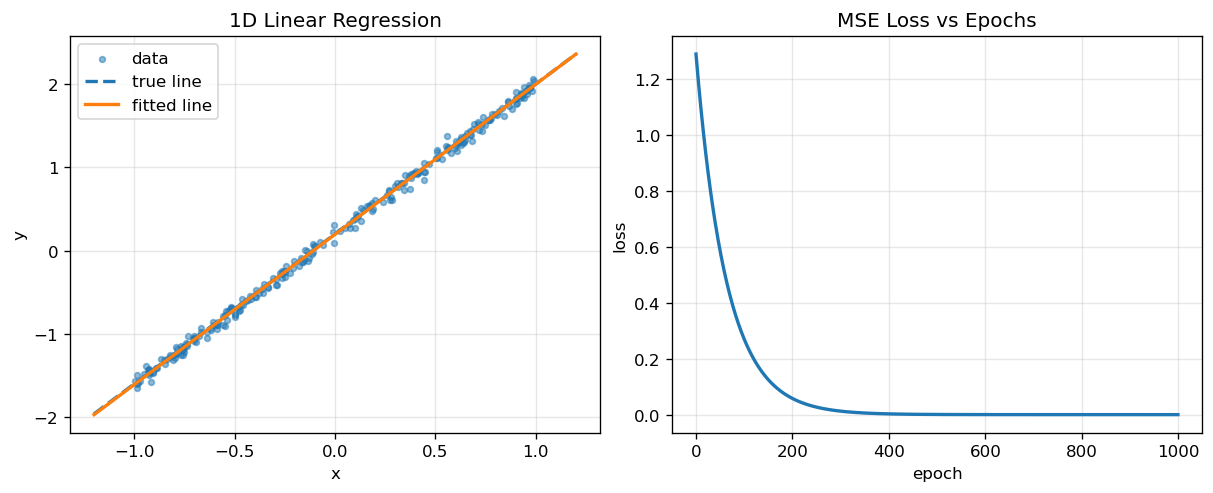

In [ ]:
# Linear Regression in JAX

plt.rcParams["figure.dpi"] = 120 # set default figure DPI for better resolution

# ==============================================================================
# Toy Example A — Linear regression (explicit), with plots
# ==============================================================================

# ---------- data ----------
key = jax.random.key(0) # random key
N = 256 # total number of samples
a_true, b_true = 1.8, 0.2 # true parameters for linear regression
key, sub = jax.random.split(key) # split key into two new keys (dont reuse same key because reusing keys causes correlation in random numbers)
x = jax.random.uniform(key, (N, 1), minval=-1.0, maxval=1.0) # x ∈ R^{N x 1} = (N,1) array of samples from U(min=-1, max=1)
noise = 0.05 * jax.random.normal(sub, (N, 1)) # Gaussian noise ∈ R^{N x 1} = 0.05 * [(N,1) array of samples from N(0,1)]
y = a_true * x + b_true + noise # y ∈ R^{N x 1} = (N,1) array of noisy targets

# ---------- model ----------
# Linear regression: f(x; θ) = a * x + b = ŷ
# Parameters: θ = (a, b) ∈ R^2  -> stored as a 1D array of shape (2,)
# Full-batch GD: use all N samples each step (B = N), with x, y, ŷ ∈ R^{N×1} 
def f(theta, x):
    a, b = theta                  # theta: (2,), x: (N,1)
    return a * x + b              # ŷ: (N,1)

# ---------- loss ----------
# Mean Squared Error over the full batch:
#   L(θ) = (1/N) * Σ_{i=1..N} ( f_θ(x_i) - y_i )^2
def mse(theta, x, y):
    yhat = f(theta, x)            # (N,1)
    return jnp.mean((yhat - y) ** 2)


# ---------- initialize theta ----------
def init_params_1d(key=None, scale=0.01): # allows passing a random key and scale for initialization
    """Return theta = [a, b]."""
    if key is None:
        return jnp.array([0.0, 0.0])    # default: zero initialization (best for linear regression)
    return scale * jax.random.normal(key, (2,)) # = scale*[(2,) array of samples from N(0,1)] (small random initialization)

# ---------- optimizer (SGD) ----------
@jax.jit # JIT-compile the SGD step function for speed
def sgd_step(theta, x, y, lr=1e-2): # note that the batch size B = N, since we use full-batch gradient descent here rather than subdivide (so each step is an epoch)
    loss, grads = jax.value_and_grad(mse)(theta, x, y) # computes loss(theta) and gradient of loss w.r.t. theta (argnum 0); note grads has same shape as theta (2,)
    theta = theta - lr * grads # SGD update with learning rate lr (lr is usually between 1e-1 and 1e-5)
    return theta, loss  # returned updated theta and previous loss

# ---------- train ----------
theta = init_params_1d(jax.random.key(1))
loss_hist = []
for epoch in range(1000): # 1000 epochs of full-batch gradient descent
    theta, loss = sgd_step(theta, x, y, lr=1e-2)
    loss_hist.append(float(loss))
    if epoch % 200 == 0:
        print(f"[1D] epoch={epoch:4d} loss={float(loss):.6f}")

a_hat, b_hat = map(float, theta)
print(f"[1D] learned a≈{a_hat:.4f}, b≈{b_hat:.4f} | true a={a_true:.4f}, b={b_true:.4f}")

# ---------- plots ----------
x_plot = jnp.linspace(-1.2, 1.2, 200)[:, None]
y_fit  = f(theta, x_plot)
y_true = a_true * x_plot + b_true

fig, axs = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

axs[0].scatter(x, y, s=12, alpha=0.5, label="data")
axs[0].plot(x_plot, y_true, '--', lw=2, label="true line")
axs[0].plot(x_plot, y_fit,  '-', lw=2, label="fitted line")
axs[0].set_title("1D Linear Regression")
axs[0].set_xlabel("x"); axs[0].set_ylabel("y")
axs[0].legend(); axs[0].grid(alpha=0.3)

axs[1].plot(loss_hist, lw=2)
axs[1].set_title("MSE Loss vs Epochs")
axs[1].set_xlabel("epoch"); axs[1].set_ylabel("loss")
axs[1].grid(alpha=0.3)

plt.show()

In [ ]:
# =================== PyTorch Quick Notes: Tensors → Autograd/Functional → nn/Optimizers ===================
# No aliases: we call torch, torch.nn, torch.nn.functional explicitly.

import torch
torch.manual_seed(0)  # reproducible per run

# -------------------------------------- TENSORS (fundamental object) --------------------------------------
x0 = torch.tensor([1.0, 2.0, 3.0])                         # (3,), float32 CPU
x1 = torch.zeros(2, 3)                                     # (2,3)
x2 = torch.randn(4, 5)                                     # ~ N(0,1), (4,5)
print("shape:", x2.shape, "dtype:", x2.dtype, "device:", x2.device)

# dtypes/devices
x64 = torch.randn(2, 2, dtype=torch.float64)
if torch.cuda.is_available():
    x_gpu = x64.to("cuda")
elif torch.backends.mps.is_available():
    x_gpu = x64.to("mps")

# reshape / broadcast
A = torch.arange(12., dtype=torch.float32).reshape(3, 4)   # (3,4)
A_T = A.T                                                  # (4,3)
B, C = torch.randn(3, 1), torch.randn(1, 4)
BC = B + C                                                 # broadcasting → (3,4)

# linear algebra (row-major batch convention)
X = torch.randn(7, 5)                                      # (B=7, d_in=5)
W = torch.randn(3, 5)                                      # (d_out=3, d_in=5)
Y = X @ W.T                                                # (7,3)
Y2 = torch.nn.functional.linear(X, weight=W, bias=None)    # same compute as X @ W.T

# NumPy interop (CPU tensors)
n = Y.cpu().numpy()
t = torch.from_numpy(n)

# -------------------------------------- AUTOGRAD & FUNCTIONAL OPS -----------------------------------------
# Any tensor with requires_grad=True accumulates grads in .grad after backward()
w = torch.randn(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

xs     = torch.linspace(-2, 2, steps=5)                    # (5,), no grad
target = 1.8 * xs + 0.2
yhat   = w * xs + b
loss   = torch.nn.functional.mse_loss(yhat, target)        # scalar loss

loss.backward()                                            # reverse-mode autodiff (backprop)
print("dL/dw:", w.grad.item(), " dL/db:", b.grad.item())
w.grad.zero_(); b.grad.zero_()

# explicit grads (value-and-grad analogue)
g_w, g_b = torch.autograd.grad(
    torch.nn.functional.mse_loss(w*xs + b, target), (w, b)
)
print("autograd.grad:", g_w.item(), g_b.item())

# freeze subsets (no grad if requires_grad=False)
w_frozen = torch.tensor(1.0, requires_grad=False)
loss2 = torch.nn.functional.mse_loss(w_frozen * xs + b, target)
loss2.backward()
print("b.grad (only):", b.grad.item()); b.grad.zero_()

# Jacobians / JVP / VJP (small problems; use torch.func)
from torch.func import jacrev, jacfwd, jvp, vjp, vmap

def Fvec(x):
    x0, x1, x2 = x.unbind()
    return torch.stack([
        x0 * torch.exp(x1),
        torch.sin(x1) + x2**2,
        x0 + x1 + x2
    ])

x0 = torch.tensor([0.7, -0.2, 0.5], requires_grad=True)
J_rev = jacrev(Fvec)(x0)                                   # reverse-mode Jacobian
J_fwd = jacfwd(Fvec)(x0)                                   # forward-mode Jacobian
print("Jac rev\n", J_rev); print("Jac fwd\n", J_fwd)

v = torch.tensor([1.0, -2.0, 0.5])
_, Jv = jvp(Fvec, (x0,), (v,))                             # J·v (forward-mode)
_, vjp_fun = vjp(Fvec, x0)
w_row = torch.tensor([0.3, -1.0, 2.0])
(JT_w,) = vjp_fun(w_row)                                   # J^T·w (reverse-mode)
print("Jv:", Jv, "\nJ^T w:", JT_w)

# ------------------------------- nn.Module (no aliases) & Optimizers ---------------------------------------
class TinyRegressor(torch.nn.Module):
    def __init__(self, d_in=1, d_out=1, hidden=16):
        super().__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Linear(d_in, hidden),
            torch.nn.Tanh(),
            torch.nn.Linear(hidden, d_out),
        )
    def forward(self, x):                                   # x: (B,d_in)
        return self.net(x)                                  # (B,d_out)

# synthetic linear data
N = 256
X = torch.linspace(-1, 1, N).unsqueeze(1)                  # (N,1)
true_a, true_b = 1.8, 0.2
Y = true_a * X + true_b + 0.05 * torch.randn_like(X)

model = TinyRegressor(d_in=1, d_out=1, hidden=16)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)

# training loop (full-batch for brevity; mini-batch works the same inside the loop)
model.train()
for step in range(1000):
    pred = model(X)                                        # (N,1)
    loss = torch.nn.functional.mse_loss(pred, Y)           # scalar
    optimizer.zero_grad(set_to_none=True)
    loss.backward()                                        # backprop
    optimizer.step()
    if step % 200 == 0:
        print(f"[train] step={step:4d} loss={loss.item():.6f}")

# ----------------------------------------------- Cheatsheet -------------------------------------------------
# • Tensors: n-d arrays; set requires_grad=True for learnable params.
# • Functional ops: torch.nn.functional.* are stateless math (activations, losses, linear/conv kernels).
# • Autograd: loss.backward() computes ∂loss/∂θ via reverse-mode; grads in .grad.
# • torch.autograd.grad(loss, params): returns grad tensors directly (doesn’t touch .grad).
# • torch.func: jacrev/jacfwd for Jacobians; jvp/vjp for directional derivatives; vmap for batching function evals.
# • nn.Module: owns parameters; combine layers; call model(x) for forward.
# • torch.optim: SGD/Adam/AdamW etc.; loop = zero_grad → backward → step.
# • Dense layer shapes: input X (B,d_in), weight W (d_out,d_in) → torch.nn.functional.linear(X,W,b) = X@W^T + b → (B,d_out).
# • Devices: model.to(device); create new tensors on same device or move them (.to(device)).
# • Prefer out-of-place ops; in-place ops can break autograd.
# • Reproducibility: torch.manual_seed(seed); also set CUDA/MPS seeds if using accelerators.




f(x) = 1.0937788486480713  df/dx = 0.5802377462387085
dL/dw = 0.8000001907348633  dL/db = 0.5999999642372131
value_and_grad: loss = 0.17000003159046173  grads = (0.8000001907348633, 0.5999999642372131)
b_train.grad = -0.40000006556510925
Jacobian via jacrev:
 tensor([[0.8187, 0.5731, 0.0000],
        [0.0000, 0.9801, 1.0000],
        [1.0000, 1.0000, 1.0000]], grad_fn=<ViewBackward0>)
Jacobian via jacfwd:
 tensor([[0.8187, 0.5731, 0.0000],
        [0.0000, 0.9801, 1.0000],
        [1.0000, 1.0000, 1.0000]], grad_fn=<ViewBackward0>)
F(x0) = tensor([0.5731, 0.0513, 1.0000], grad_fn=<AliasBackward0>) 
JVP (J·v) = tensor([-0.3275, -1.4601, -0.5000], grad_fn=<StackBackward0>)
F(x0) = tensor([0.5731, 0.0513, 1.0000], grad_fn=<StackBackward0>) 
VJP (J^T·w) = tensor([2.2456, 1.1919, 1.0000], grad_fn=<StackBackward0>)
Batched Jacobians shape: torch.Size([3, 3, 3])


AttributeError: 'function' object has no attribute 'mse_loss'

In [21]:
#   2) Text (bag-of-words):             x = [count/tf-idf of vocab item i],                     ŷ = [class_prob(i)] for i = 0,1,..,K-1 (K classes)

# 2) Text (bag-of-words → K classes)
#   Vocabulary (size |V|):
#       - The set of distinct tokens (words/subwords) you allow in your model.
#       - Built from training text after preprocessing (lowercasing, punctuation handling,
#         optional stopword removal, stemming/lemmatization).
#       - Each token gets an index 0..|V|-1. (Often keep a special <UNK> for OOV words.)
#
#   Bag-of-Words (BoW) feature x ∈ R^{|V|}:
#       - A *fixed-length* vector where x[i] quantifies token i in the document (e.g. x[i] = count of token i)
#       - Order is discarded (bag), only counts remain.
#
#   Classes:
#       - The set of document categories you want to predict (e.g., sports, politics, tech).
#       - Each class gets an index 0..K-1.
#
#   Output: ŷ ∈ R^{d_out=K} with ŷ[i] = probability of document belonging to class i for i = 0,..,K-1
#
#    Suggested MLP: |V| → h=128 → K
#    Weights/Biases:
#      W1 ∈ R^{128×|V|}, b1 ∈ R^{128}
#      W2 ∈ R^{K×128},   b2 ∈ R^{K}
#    Activations:
#      hidden σ: ReLU or GELU
#    Output head:
#      logits z = W2 h1 + b2 ∈ R^{K}; probs = softmax(z) ∈ R^{d_out = K}    # multi-class classification


#    Code (JAX-style pseudocode):
#      def mse_loss(y_hat, y):         
#          return jnp.mean((y_hat - y)**2) (mean over entire matrix: batch and output dims)
#
# 2) BINARY CLASSIFICATION  (probability in (0,1), i.e., 2 classs)
#    - logits z ∈ R^{B x 1} = R^{B}, ŷ = σ(z) ∈ (0,1)^B  (predicted prob), y ∈ {0,1}^B (true labels) (equivalently z ∈ R^{B×2}, ŷ ∈ (0,1)^{B×2}, y ∈ {0,1}^{B×2}) with 
#    - Use *binary cross-entropy with logits* for numerical stability.
#        ℓ(ŷ[i], y[i]) = softplus(z[i]) - y[i]*z[i]= [ log(1 + exp(z[i])) - y[i] * z[i] ] = [ - y[i] * log(σ(z[i])) - (1 - y[i]) * log(1 - σ(z[i])) ] = cross entropy between predicted probs and true labels distributions
#     - L(θ) = 1/B Σ_i ℓ(ŷ[i], y[i]) = 1/B Σ_i [ - y[i] * log(σ(z[i])) - (1 - y[i]) * log(1 - σ(z[i])) ] 
#
#    Code:
#      def bce_with_logits_loss(logits, y):   # logits,y: (B,1) or (B,)
#          return jnp.mean(jnp.softplus(logits) - y*logits)
#
# 3) MULTI-CLASS CLASSIFICATION (K classes)
#     - logits z ∈ R^{B×K}, ŷ = softmax(z) ∈ [0,1]^{B×K} (predicted class probs), y ∈ {0,..,K-1}^B (true integer labels)
#     - Use *categorical cross-entropy with logits* for numerical stability.
#        ℓ[ŷ[i], y[i]] = -log softmax(z)[range(B), y] = log [1/ Σ_j exp(z[i,j]) - z[i, y[i]]] = cross entropy between predicted class distribution and true class distribution
#     - L(θ) = 1/B Σ_i ℓ[ŷ[i], y[i]] = 1/B Σ_i [ log Σ_j exp(z[i,j]) - z[i, y[i]] ]
#
#    Code:
#      def cross_entropy_logits(logits, y_int):  # logits: (B,K), y_int: (B,)
#          log_probs = logits - jax.nn.logsumexp(logits, axis=1, keepdims=True)
#          return -jnp.mean(log_probs[jnp.arange(logits.shape[0]), y_int])


# CLASSIFIERS — GENERAL SETUP (domain-agnostic: galaxies, images, spectra, docs, etc.)
# -----------------------------------------------------------------------------
# DATA
#   - Input (features):    x ∈ R^{d_in}            # e.g., morphology stats, pixel arrays, spectra, text vectors
#   - Batch of size B:     X ∈ R^{B×d_in}
#   - Targets/labels:      vary by task (see below)
#
# MODEL (logit-producing network)
#   - f_θ : R^{d_in} → R^{d_out} produces logits z (unnormalized scores).
#   - For a batch: Z = f_θ(X) has shape:
#       * Binary:      Z ∈ R^{B}          (single logit per example)  OR  R^{B×2} (two-logit softmax form)
#       * Multiclass:  Z ∈ R^{B×K}        (K classes, one label per example)
#       * Multi-label: Z ∈ R^{B×K}        (K independent binary tags per example)
#   - Probabilities come from a link function:
#       * Binary:      p = σ(z)                 # sigmoid on single logit
#       * Multiclass:  P = softmax(Z, axis=1)   # row-wise class probs sum to 1
#       * Multi-label: P = σ(Z)                 # sigmoid per class (independent)
#
# TASKS & TARGET ENCODINGS
#   1) Binary classification (two classes: {0,1})
#      - Labels: y ∈ {0,1}^B                 # scalar per example
#      - Logits: z ∈ R^{B}                    # single logit (preferred)
#        (equivalently: two-logit Z ∈ R^{B×2}, where z = Z[:,1]−Z[:,0])
#      - Loss (per-example): ℓ_i = softplus(z_i) − y_i*z_i
#        Batch mean: L(θ) = (1/B) Σ_i ℓ_i
#        (Same as −[ y log σ(z) + (1−y) log(1−σ(z)) ])
#
#   2) Multiclass classification (exactly one of K classes)
#      - Labels: y_int ∈ {0,…,K−1}^B   # integer class indices
#        (or one-hot Y_onehot ∈ {0,1}^{B×K} with row sums = 1)
#      - Logits: Z ∈ R^{B×K}
#      - Loss (per-example): ℓ_i = −log softmax(Z_i)[y_int[i]]
#        Efficient form: ℓ_i = logsumexp(Z_i) − Z_i[y_int[i]]
#        Batch mean: L(θ) = (1/B) Σ_i ℓ_i
#
#   3) Multi-label classification (K independent binary tags per example)
#      - Labels: Y ∈ {0,1}^{B×K}       # each row can have multiple 1s
#      - Logits: Z ∈ R^{B×K}
#      - Loss (per-example, per-class): ℓ_i,c = softplus(Z_{i,c}) − Y_{i,c} * Z_{i,c}
#        Aggregate over classes then mean over batch:
#        L(θ) = (1/B) Σ_i ( (1/K) Σ_c ℓ_i,c )
#
# REDUCTIONS / AVERAGING
#   - Most frameworks expose a reduction mode: 'mean' (default), 'sum', or 'none' (per-example losses).
#   - Typical training uses the mean over the batch (and over classes for multi-label).
#
# METRICS (evaluation; NOT used for training gradients)
#   - Accuracy (multiclass): argmax over classes vs label.
#   - Precision/Recall/F1, ROC-AUC/PR-AUC (binary & multi-label).
#   - Top-k accuracy (multiclass, K large).
#
# COMMON SHAPES (summary)
#   - Binary (single logit):     logits z:(B,), labels y:(B,)
#   - Multiclass (K classes):    logits Z:(B,K), labels y_int:(B,)
#   - Multi-label (K tags):      logits Z:(B,K), labels Y:(B,K)
#
# NOTES
#   - Logits are unnormalized scores; ONLY probabilities must sum to 1 (softmax) or lie in (0,1) (sigmoid).
#   - One-logit binary and two-logit softmax are equivalent via z = z1 − z0.
#   - Class imbalance? Consider weighting the loss per class or using focal loss.
#   - Always separate: model (produces logits) + loss (turns logits+labels → scalar).
#
# CODE SNIPPETS (JAX & Torch; binary / multiclass / multi-label)
#   JAX (binary):
#     def bce_with_logits(z, y):   # z,y: (B,) or (B,1)
#         return jnp.mean(jax.nn.softplus(z) - y*z)
#
#   JAX (multiclass):
#     def ce_logits(Z, y_int):     # Z:(B,K), y_int:(B,)
#         log_probs = Z - jax.nn.logsumexp(Z, axis=1, keepdims=True)
#         return -jnp.mean(log_probs[jnp.arange(Z.shape[0]), y_int])
#
#   JAX (multi-label):
#     def multilabel_bce(Z, Y):    # both (B,K)
#         return jnp.mean(jax.nn.softplus(Z) - Y*Z)
#
#   PyTorch:
#     # Binary:    torch.nn.BCEWithLogitsLoss()
#     # Multiclass torch.nn.CrossEntropyLoss()       # expects logits (B,K) and y_int (B,)
#     # Multi-label torch.nn.BCEWithLogitsLoss()     # apply to (B,K) logits vs (B,K) 0/1 labels



In [22]:
# 


# REGULARIZATION (optional addition to loss to prevent overfitting)
# -----------------------------------------------------------------------------
# - L2 weight decay:  λ * Σ_ℓ ||W_ℓ||²   (often exclude biases from decay)
#   Helps prevent overfitting; for Adam use AdamW-style decoupled weight decay.
#
#   Code (collect weights only):
#     def l2_weight_decay(theta, exclude_bias=True):
#         sqsum = 0.0
#         for name, param in theta.items():
#             if exclude_bias and (name.endswith("b") or "bias" in name.lower()):
#                 continue
#             sqsum = sqsum + jnp.sum(param*param)
#         return sqsum
#
#     total_loss = data_loss + lambda_wd * l2_weight_decay(theta)
#
# WEIGHT INITIALIZATION (before training starts)
# -----------------------------------------------------------------------------


# ========== Minimal “from scratch” MLP utilities (lecture-style) ==========
def glorot(key, fan_in, fan_out):
    lim = jnp.sqrt(6.0 / (fan_in + fan_out))
    k1, k2 = jax.random.split(key)
    W = jax.random.uniform(k1, (fan_in, fan_out), minval=-lim, maxval=lim)
    b = jnp.zeros((fan_out,))
    return W, b, k2

def init_mlp(key, layer_sizes):
    """
    layer_sizes: e.g. [d_in, h1, h2, d_out]
    returns: list of layers, each {'W': (m,n), 'b': (n,)}
    """
    params = []
    for m, n in zip(layer_sizes[:-1], layer_sizes[1:]):
        W, b, key = glorot(key, m, n)
        params.append({"W": W, "b": b})
    return params

def mlp_forward(params, x, activation=jnp.tanh):
    """
    x: (..., d_in)
    params: list of dicts with 'W' (d_in,d_out), 'b' (d_out,)
    """
    h = x
    for i, layer in enumerate(params):
        W, b = layer["W"], layer["b"]
        h = h @ W + b                    # affine: hW + b
        if i < len(params) - 1:          # nonlinearity on hidden layers only
            h = activation(h)
    return h  # (..., d_out)
